## Useful links for forecasting

https://github.com/julianikulski/bike-sharing/blob/master/bike_sharing_demand.ipynb

https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac

## Import modules

In [1]:
import os
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from utils.helpers import best_window_std, best_window_mean

## Import data

In [2]:
path_csv_daily = os.path.join(os.getcwd(), os.pardir, "data/slovenia_daily.csv")
path_csv_weekly = os.path.join(os.getcwd(), os.pardir, "data/slovenia_weekly.csv")
data_pd_daily = pd.read_csv(path_csv_daily)
data_pd_weekly = pd.read_csv(path_csv_weekly)
print("Daily coloumn values: ", data_pd_daily.columns)
print("Weekly coloumn values: ", data_pd_weekly.columns)
target_label = "new_cases"

Daily coloumn values:  Index(['date', 'day', 'week', 'month', 'new_cases', 'new_deaths',
       'tests_performed', 'tests_positive', 'region_ce_active',
       'region_foreign_active', 'region_kk_active', 'region_kp_active',
       'region_kr_active', 'region_lj_active', 'region_mb_active',
       'region_ms_active', 'region_ng_active', 'region_nm_active',
       'region_po_active', 'region_sg_active', 'region_unknown_active',
       'region_za_active', 'region_active', 'state_in_hospital', 'state_icu',
       'state_critical', 'state_care', 'state_deceased',
       'kindergarten_employees_confirmed', 'kindergarten_attendees_confirmed',
       'elementary_employees_confirmed', 'elementary_attendees_confirmed',
       'highschool_employees_confirmed', 'highschool_attendees_confirmed',
       'institutions_employees_confirmed', 'institutions_attendees_confirmed',
       'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'wpgt', 'pres'],
      dtype='object')
Weekly coloumn values:  Index(['

## Plot correlation and partial correlation plots

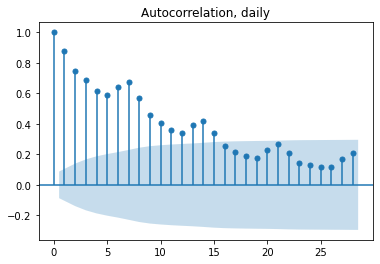

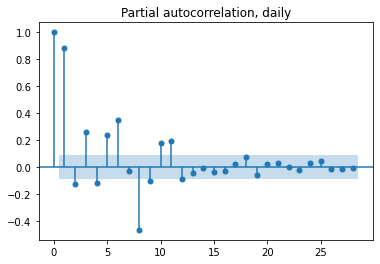

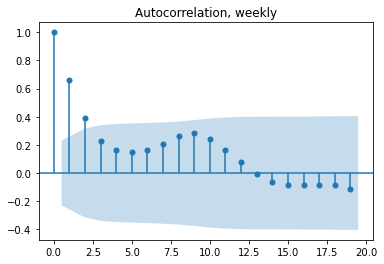

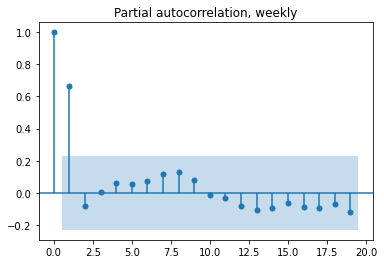

In [3]:
plot_acf(data_pd_daily[target_label], title='Autocorrelation, daily')
plot_pacf(data_pd_daily[target_label], title='Partial autocorrelation, daily')
plot_acf(data_pd_weekly[target_label], title='Autocorrelation, weekly')
plot_pacf(data_pd_weekly[target_label], title='Partial autocorrelation, weekly');

## Get best rolling mean and std values

{1: 0.9222512052260177, 29: 0.24102890080749761}
{1: 0.8863851984912264, 28: 0.7028417852953774}
Corr: p-val:
(0.6676768014879113, 5.006506994739698e-10)
(0.8579222322653166, 9.248766399782867e-21)


<AxesSubplot:>

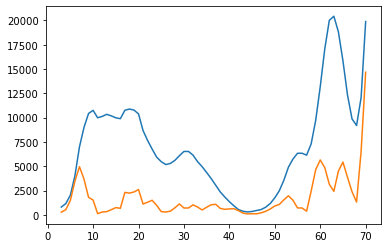

In [4]:
# get the optimal number for rolling mean and std 
print(best_window_mean(data_pd_weekly[target_label], data_pd_weekly[target_label], 30))
print(best_window_std(data_pd_weekly[target_label], data_pd_weekly[target_label], 30))

# get the correlation for window size determined by target label
win_size = 4
mean_val = data_pd_weekly[target_label].rolling(win_size).mean()[win_size-1:-1]
print("Corr: p-val:")
print(pearsonr(mean_val, data_pd_weekly[target_label][win_size:]))
temp_mean = data_pd_weekly[target_label].rolling(win_size).std()[win_size-1:-1]
print(pearsonr(temp_mean, data_pd_weekly[target_label][win_size:]))

data_pd_weekly[target_label].rolling(win_size).mean()[win_size-1:-1].plot()
data_pd_weekly[target_label].rolling(win_size).std()[win_size-1:-1].plot()